In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
train = pd.read_csv('./15_modified_data/train_data.csv')
train.head()
train.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date', 'max_temp',
       'min_temp', 'precip', 'snow', 'snow_depth', 'wind_speed',
       'pickup_community_name', 'dropoff_community_name', 'year', 'month',
       'day', 'day_of_week', 'hour', 'weekend', 'nonzero_tip'],
      dtype='object')

In [3]:
y = train['nonzero_tip']
len(y)


83703

In [4]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
train['month_int'] = train['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
train['day_ofweek_int'] = train['day_of_week'].map(day_map)
# train['day_ofweek_int'].value_counts()
train.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [5]:
train['time_of_day'] = 's'
train.loc[(train['hour'] >= 4) & (train['hour'] < 7), 'time_of_day'] = 'early morning'
train.loc[(train['hour'] >= 7) & (train['hour'] < 11), 'time_of_day'] = 'morning rush hour'
train.loc[(train['hour'] >= 11) & (train['hour'] < 14), 'time_of_day'] = 'midday'
train.loc[(train['hour'] >= 14) & (train['hour'] < 16), 'time_of_day'] = 'afternoon'
train.loc[(train['hour'] >= 16) & (train['hour'] < 19), 'time_of_day'] = 'aft rush hour'
train.loc[(train['hour'] >= 19) & (train['hour'] < 23), 'time_of_day'] = 'evening'
train.loc[(train['hour'] >= 23) | (train['hour'] < 4), 'time_of_day'] = 'late night'



In [6]:
train['season'] = 's'
train.loc[(train['month_int'] >= 3) & (train['month_int'] <= 5), 'season'] = 'spring'
train.loc[(train['month_int'] >= 6) & (train['month_int'] <= 8), 'season'] = 'summer'
train.loc[(train['month_int'] >= 9) & (train['month_int'] <= 11), 'season'] = 'autumn'
train.loc[(train['month_int'] >= 12) | (train['month_int'] <= 2), 'season'] = 'winter'

In [7]:
train['public_hol'] = 0

In [8]:
train.loc[(train['month_int'] == 1) & (train['day'] == 1), 'public_hol'] = 1
train.loc[(train['month_int'] == 6) & (train['day'] == 19), 'public_hol'] = 1
train.loc[(train['month_int'] == 7) & (train['day'] == 4), 'public_hol'] = 1
train.loc[(train['month_int'] == 11) & (train['day'] == 11), 'public_hol'] = 1
train.loc[(train['month_int'] == 12) & (train['day'] == 25), 'public_hol'] = 1

# MLK
train.loc[(train['month_int'] == 1) & (train['day'] == 15) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 1) & (train['day'] == 21) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 1) & (train['day'] == 20) & (train['year'] == 2020), 'public_hol'] = 1

# presidents day
train.loc[(train['month_int'] == 2) & (train['day'] == 19) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 2) & (train['day'] == 18) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 2) & (train['day'] == 17) & (train['year'] == 2020), 'public_hol'] = 1

# memorial
train.loc[(train['month_int'] == 5) & (train['day'] == 28) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 5) & (train['day'] == 27) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 5) & (train['day'] == 25) & (train['year'] == 2020), 'public_hol'] = 1

# labour day
train.loc[(train['month_int'] == 9) & (train['day'] == 3) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 9) & (train['day'] == 2) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 9) & (train['day'] == 7) & (train['year'] == 2020), 'public_hol'] = 1


# columbus day
train.loc[(train['month_int'] == 10) & (train['day'] == 8) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 10) & (train['day'] == 14) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 10) & (train['day'] == 12) & (train['year'] == 2020), 'public_hol'] = 1


# thanksgiving
train.loc[(train['month_int'] == 11) & (train['day'] == 22) & (train['year'] == 2018), 'public_hol'] = 1
train.loc[(train['month_int'] == 11) & (train['day'] == 28) & (train['year'] == 2019), 'public_hol'] = 1
train.loc[(train['month_int'] == 11) & (train['day'] == 26) & (train['year'] == 2020), 'public_hol'] = 1


In [9]:
train.columns
train.dtypes

trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
fare                      float64
tip                         int64
additional_charges        float64
shared_trip_authorized       bool
trips_pooled                int64
date                       object
max_temp                  float64
min_temp                  float64
precip                    float64
snow                      float64
snow_depth                float64
wind_speed                float64
pickup_community_name      object
dropoff_community_name     object
year                        int64
day                         int64
hour                        int64
weekend                     int64
nonzero_tip                 int64
month_int                   int64
day_ofweek_int              int64
time_of_day                object
season                     object
public_hol                  int64
dtype: object

In [10]:
train['public_hol'].isnull().sum()

0

In [11]:
X = pd.get_dummies(train, columns = ['dropoff_community_name', 'pickup_community_name', 'time_of_day', 'season'])
X.drop(['nonzero_tip', 'tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)

In [12]:
val = pd.read_csv('./15_modified_data/val_data.csv')
val.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,...,wind_speed,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2018-11-18 07:00:00,2018-11-18 07:00:00,100.0,0.572958,2.5,0,2.50,False,1,2018-11-18,...,100.66230,IRVING PARK,IRVING PARK,2018,November,18,Sunday,7,1,0
1,2020-01-22 09:30:00,2020-01-22 09:45:00,986.0,4.142381,10.0,0,4.83,False,1,2020-01-22,...,170.00744,NEAR NORTH SIDE,LOOP,2020,January,22,Wednesday,9,0,0
2,2018-11-26 18:45:00,2018-11-26 19:00:00,584.0,1.830871,5.0,1,2.50,False,1,2018-11-26,...,331.06712,LAKE VIEW,LINCOLN PARK,2018,November,26,Monday,18,0,1
3,2018-12-30 15:15:00,2018-12-30 15:30:00,819.0,4.976403,10.0,0,2.50,False,1,2018-12-30,...,210.27236,SOUTH SHORE,FULLER PARK,2018,December,30,Sunday,15,1,0
4,2019-07-01 23:45:00,2019-07-02 00:00:00,1162.0,8.918748,15.0,2,2.55,False,1,2019-07-01,...,170.00744,NEAR WEST SIDE,EDGEWATER,2019,July,1,Monday,23,0,1


In [13]:
val_y = val['nonzero_tip']
len(val_y)


11957

In [14]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
val['month_int'] = val['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
val['day_ofweek_int'] = val['day_of_week'].map(day_map)
# val['day_ofweek_int'].value_counts()
val.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [15]:
val['time_of_day'] = 's'
val.loc[(val['hour'] >= 4) & (val['hour'] < 7), 'time_of_day'] = 'early morning'
val.loc[(val['hour'] >= 7) & (val['hour'] < 11), 'time_of_day'] = 'morning rush hour'
val.loc[(val['hour'] >= 11) & (val['hour'] < 14), 'time_of_day'] = 'midday'
val.loc[(val['hour'] >= 14) & (val['hour'] < 16), 'time_of_day'] = 'afternoon'
val.loc[(val['hour'] >= 16) & (val['hour'] < 19), 'time_of_day'] = 'aft rush hour'
val.loc[(val['hour'] >= 19) & (val['hour'] < 23), 'time_of_day'] = 'evening'
val.loc[(val['hour'] >= 23) | (val['hour'] < 4), 'time_of_day'] = 'late night'



In [16]:
val['season'] = 's'
val.loc[(val['month_int'] >= 3) & (val['month_int'] <= 5), 'season'] = 'spring'
val.loc[(val['month_int'] >= 6) & (val['month_int'] <= 8), 'season'] = 'summer'
val.loc[(val['month_int'] >= 9) & (val['month_int'] <= 11), 'season'] = 'autumn'
val.loc[(val['month_int'] >= 12) | (val['month_int'] <= 2), 'season'] = 'winter'

In [17]:
val['public_hol'] =0
val.loc[(val['month_int'] == 1) & (val['day'] == 1), 'public_hol'] = 1
val.loc[(val['month_int'] == 6) & (val['day'] == 19), 'public_hol'] = 1
val.loc[(val['month_int'] == 7) & (val['day'] == 4), 'public_hol'] = 1
val.loc[(val['month_int'] == 11) & (val['day'] == 11), 'public_hol'] = 1
val.loc[(val['month_int'] == 12) & (val['day'] == 25), 'public_hol'] = 1

# MLK
val.loc[(val['month_int'] == 1) & (val['day'] == 15) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 1) & (val['day'] == 21) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 1) & (val['day'] == 20) & (val['year'] == 2020), 'public_hol'] = 1

# presidents day
val.loc[(val['month_int'] == 2) & (val['day'] == 19) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 2) & (val['day'] == 18) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 2) & (val['day'] == 17) & (val['year'] == 2020), 'public_hol'] = 1

# memorial
val.loc[(val['month_int'] == 5) & (val['day'] == 28) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 5) & (val['day'] == 27) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 5) & (val['day'] == 25) & (val['year'] == 2020), 'public_hol'] = 1

# labour day
val.loc[(val['month_int'] == 9) & (val['day'] == 3) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 9) & (val['day'] == 2) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 9) & (val['day'] == 7) & (val['year'] == 2020), 'public_hol'] = 1


# columbus day
val.loc[(val['month_int'] == 10) & (val['day'] == 8) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 10) & (val['day'] == 14) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 10) & (val['day'] == 12) & (val['year'] == 2020), 'public_hol'] = 1


# thanksgiving
val.loc[(val['month_int'] == 11) & (val['day'] == 22) & (val['year'] == 2018), 'public_hol'] = 1
val.loc[(val['month_int'] == 11) & (val['day'] == 28) & (val['year'] == 2019), 'public_hol'] = 1
val.loc[(val['month_int'] == 11) & (val['day'] == 26) & (val['year'] == 2020), 'public_hol'] = 1


In [18]:
val['public_hol'].value_counts()
val['public_hol'].isnull().sum()

0

In [19]:
val_X = pd.get_dummies(val, columns = ['dropoff_community_name', 'pickup_community_name', 'time_of_day', 'season'])
val_X.drop(['nonzero_tip', 'tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)

In [20]:
train.columns

Index(['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'fare', 'tip', 'additional_charges',
       'shared_trip_authorized', 'trips_pooled', 'date', 'max_temp',
       'min_temp', 'precip', 'snow', 'snow_depth', 'wind_speed',
       'pickup_community_name', 'dropoff_community_name', 'year', 'day',
       'hour', 'weekend', 'nonzero_tip', 'month_int', 'day_ofweek_int',
       'time_of_day', 'season', 'public_hol'],
      dtype='object')

In [21]:
len(X.columns)
# len(val_X.columns)


184

In [22]:
pd.set_option('display.max_rows', None)


In [23]:
val_X.isnull().sum()

trip_seconds                                     0
trip_miles                                       0
fare                                             0
additional_charges                               0
shared_trip_authorized                           0
trips_pooled                                     0
max_temp                                         0
min_temp                                         0
precip                                           0
snow                                             0
snow_depth                                       0
wind_speed                                       0
year                                             0
day                                              0
hour                                             0
weekend                                          0
month_int                                        0
day_ofweek_int                                   0
public_hol                                       0
dropoff_community_name_ALBANY P

In [24]:
X.drop(['dropoff_community_name_RIVERDALE'], axis = 1, inplace=True)

In [25]:
log = LogisticRegression()
log.fit(X, y)
ypred = log.predict(val_X)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [26]:
accuracy_score(ypred, val_y)

0.8223634690975997

In [27]:
from sklearn import linear_model

In [28]:
logl1 = LogisticRegression(penalty='l1', solver='liblinear')
logl1.fit(X, y)
ypred = logl1.predict(val_X)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
accuracy_score(ypred, val_y)

0.823450698335703

In [30]:
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [34]:
sns.set(rc={"figure.figsize": (15, 10)})
penalties = np.linspace(-2, 6, 15)
l1_scores = []
l2_scores = []
e_scores = []
for penalty in penalties:
    log_model = LogisticRegression(
        max_iter=2000,
        solver="liblinear",
        penalty="l1",
        C=10 ** penalty,
        random_state=7452,
    ).fit(X, y)
    l1_scores.append(
        roc_auc_score(val_y, log_model.predict_proba(val_X)[:, 1])
    )
    log_model = LogisticRegression(
        max_iter=2000,
        solver="liblinear",
        penalty="l2",
        C=10 ** penalty,
        random_state=7452,
    ).fit(X, y)
    l2_scores.append(
        roc_auc_score(val_y, log_model.predict_proba(val_X)[:, 1])
    )

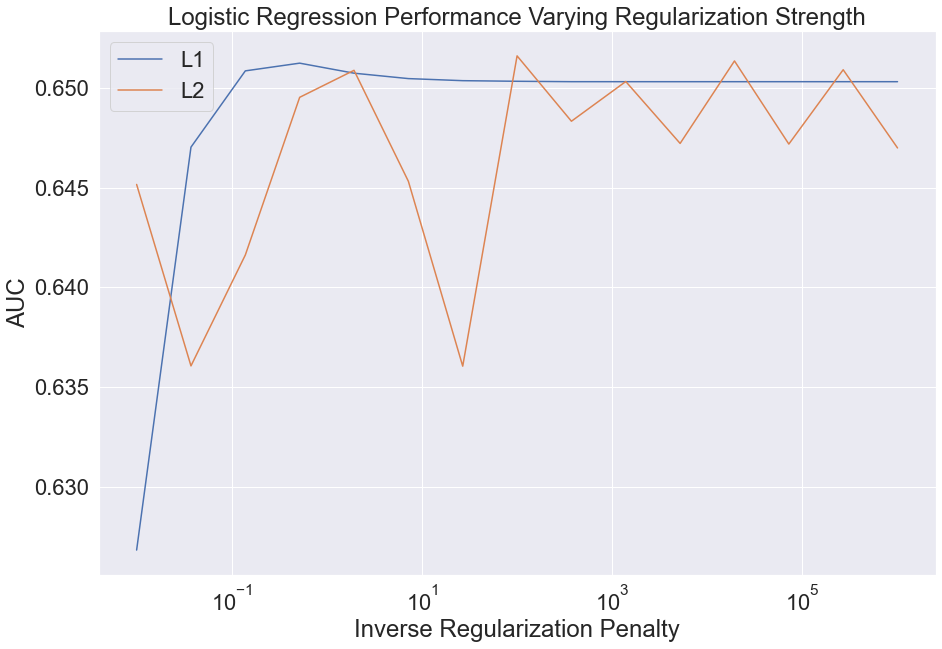

In [32]:
sns.set(font_scale = 2)
plt.plot(10**penalties, l1_scores, label = "L1")
plt.plot(10**penalties, l2_scores, label = "L2")
plt.title("Logistic Regression Performance Varying Regularization Strength")
plt.xlabel("Inverse Regularization Penalty")
plt.ylabel("AUC")
plt.legend()
plt.xscale("log")
plt.show()